In [1]:
import pyclesperanto_prototype as cle

cle.select_device('Intel')

cle.get_device()

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [2]:
cle.set_wait_for_kernel_finish(True)

# Centroids of 2D labels

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


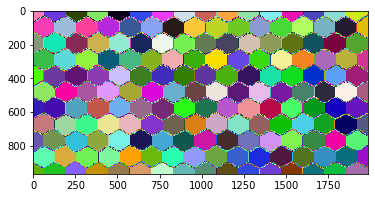

In [3]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

In [4]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=False)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


CPU centroid took 0.18291711807250977 s
CPU centroid took 0.16256093978881836 s
CPU centroid took 0.16057205200195312 s
CPU centroid took 0.15512967109680176 s
CPU centroid took 0.15961551666259766 s
CPU centroid took 0.1495954990386963 s
CPU centroid took 0.15916156768798828 s
CPU centroid took 0.16258907318115234 s
CPU centroid took 0.15953636169433594 s
CPU centroid took 0.1486508846282959 s


In [5]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.0289306640625 s
GPU centroid took 0.030932903289794922 s
GPU centroid took 0.01990818977355957 s
GPU centroid took 0.0159914493560791 s
GPU centroid took 0.015926599502563477 s
GPU centroid took 0.01599407196044922 s
GPU centroid took 0.014953374862670898 s
GPU centroid took 0.01495051383972168 s
GPU centroid took 0.015957117080688477 s
GPU centroid took 0.015985965728759766 s


# Centroids of 3D labels

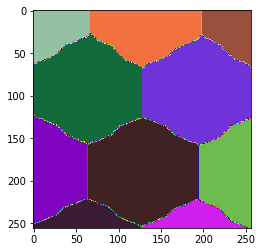

In [6]:
stack = cle.create([128, 256, 256])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

In [7]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=False)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

CPU centroid took 1.3822004795074463 s
CPU centroid took 1.476078748703003 s
CPU centroid took 1.9724094867706299 s
CPU centroid took 1.3778584003448486 s
CPU centroid took 1.3857991695404053 s
CPU centroid took 1.4172108173370361 s
CPU centroid took 1.3674938678741455 s
CPU centroid took 1.3958396911621094 s
CPU centroid took 1.3860089778900146 s
CPU centroid took 1.3753581047058105 s


In [8]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.16212892532348633 s
GPU centroid took 0.15707921981811523 s
GPU centroid took 0.15462470054626465 s
GPU centroid took 0.1555476188659668 s
GPU centroid took 0.1575779914855957 s
GPU centroid took 0.15857601165771484 s
GPU centroid took 0.1575794219970703 s
GPU centroid took 0.16456007957458496 s
GPU centroid took 0.1566169261932373 s
GPU centroid took 0.15355348587036133 s
